In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))  #X有两个特征
X[:,0] = np.random.uniform(0.,100.,size = 100)  #.random.uniform 从一个均匀分布[low,high)中随机采样，注意定义域是左闭右开，即包含low，不包含high.
X[:,1] = 0.75 * X[:,0] + 3.+ np.random.normal(0,10,size = 100) #两个特征之间有一定的线性关系

<function matplotlib.pyplot.show(*args, **kw)>

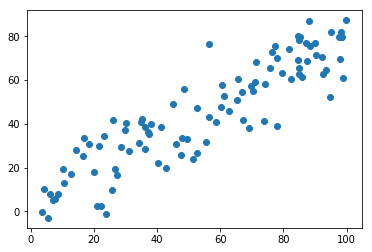

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show

### demean均值归零化

In [4]:
def demean(X):
    return X - np.mean(X,axis = 0)  #axis = 0 代表X矩阵在行的方向上去求一个均值

<function matplotlib.pyplot.show(*args, **kw)>

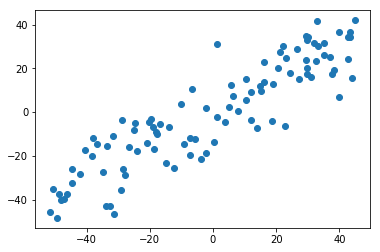

In [5]:
X_demean = demean(X)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show

In [6]:
np.mean(X_demean[:,0])

-2.899014361901209e-14

In [7]:
np.mean(X_demean[:,1])

2.771116669464391e-15

In [8]:
def f(w,X):
    return np.sum((X.dot(w)**2))/len(X)

In [9]:
def df_math(w,x):
    return X.T.dot(X.dot(w)) *2./len(X)

### 梯度上升法

In [10]:
def df_debug(w,X,epsilon = 0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1,X) - f(w_2,X)) / (2*epsilon)
    return res

In [11]:
#梯度上升法
def direction(w):  #把w转化为单位向量
    return w / np.linalg.norm(w)
    
def gradient_ascent(df,X,initial_w ,eta,n_iters = 1e4,epsilon = 1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        
        gradient = df_math(w,X) #梯度值
        last_w =w
        w = w + eta *gradient
        w = direction(w)  # 注意1： 每一次求一个单位方向的单位向量
        
        if(abs(f(w,X) - f(last_w,X)) < epsilon):
            break
        cur_iter += 1
    return w


In [12]:
initial_w = np.random.random(X.shape[1]) #注意2：不能用0向量开始

In [13]:
eta = 0.001

In [14]:
gradient_ascent(df_debug,X_demean,initial_w ,eta)

array([0.77342943, 0.63388242])

In [15]:
gradient_ascent(df_math,X_demean,initial_w ,eta)

array([0.77342943, 0.63388242])

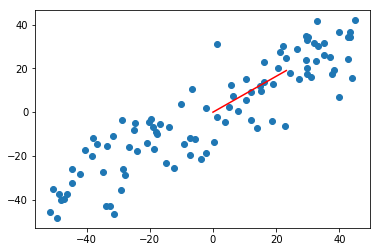

In [16]:
w  = gradient_ascent(df_debug,X_demean,initial_w ,eta)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*30],[0,w[1]*30],color = 'r')